In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 10
plt.rcParams['pdf.fonttype'] = 42
df = pd.read_csv("Madison.csv")
df.head()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

def qry(sql,a):
    return pd.read_sql(sql,a)

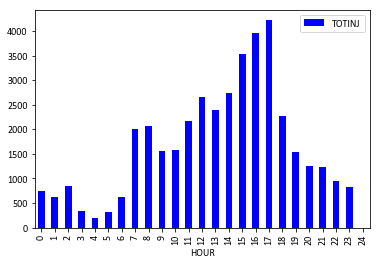

In [3]:
con1=qry("""
SELECT "NTFYHOUR" as "HOUR",sum("TOTINJ") as "TOTINJ"
FROM df
GROUP BY "NTFYHOUR"
""",conn)

ax=con1.plot.bar(x="HOUR",y="TOTINJ",color="blue")

In [4]:
ax.get_figure().savefig("INJ.eps", bbox_inches="tight")

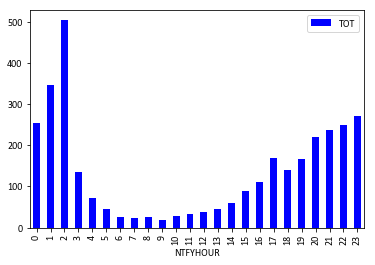

In [5]:
con2=qry("""
SELECT "NTFYHOUR",sum("TOTINJ") as "TOT"
FROM df
WHERE ALCFLAG=="Y"
GROUP BY "NTFYHOUR"
""",conn)

con2.plot.bar(x="NTFYHOUR",y="TOT",color="blue")

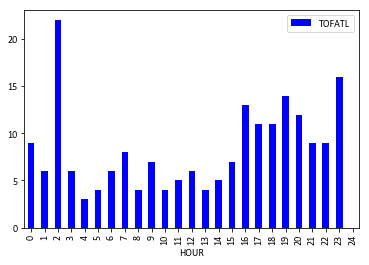

In [6]:
con3=qry("""
SELECT "NTFYHOUR" as "HOUR",sum("TOTFATL") as "TOFATL"
FROM df
GROUP BY "HOUR"
""",conn)

ax1=con3.plot.bar(x="HOUR",y="TOFATL",color="blue")
ax1.get_figure().savefig("FAT.eps", bbox_inches="tight")

In [7]:
isnull_ALO = df["ALCFLAG"].isnull()
df["ALCFLAG"].fillna("N", inplace = True)

Text(0.5, 1.0, '% Drunk Driving in Madison by Hour')

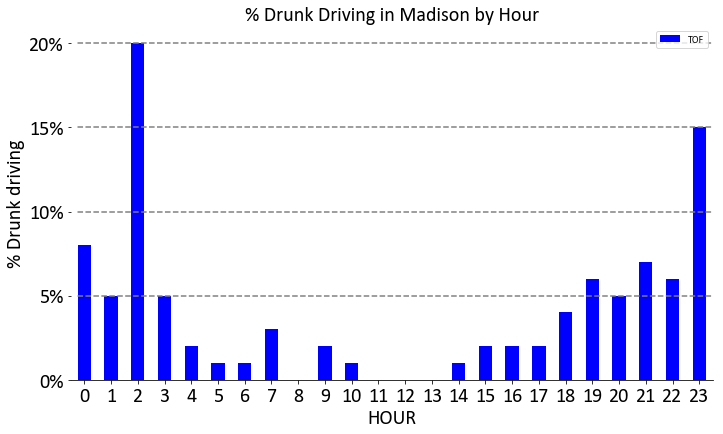

In [8]:
con4=qry("""
SELECT "NTFYHOUR",sum("TOTFATL") as "TOF"
FROM df
WHERE ALCFLAG=="Y"
GROUP BY "NTFYHOUR"
""",conn)

ax1=con4.plot.bar(x="NTFYHOUR",y="TOF",color="blue",fontsize=20,rot=0)
ax1.set_xlabel("HOUR",fontsize=20)
ax1.set_ylabel("% Drunk driving",fontsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11.5, 6.5)
fig.savefig('SPEED.eps', dpi=100)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

import matplotlib.ticker as mtick
import numpy as np

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,21,5)
plt.yticks(my_y_ticks)
ax1.hlines(5, 30, -0.3, colors = "grey", linestyles = "dashed")
ax1.hlines(10, 30, -0.3, colors = "grey", linestyles = "dashed")
ax1.hlines(15, 30, -0.3, colors = "grey", linestyles = "dashed")
ax1.hlines(20, 30, -0.3, colors = "grey", linestyles = "dashed")
#ax.hlines(5, 10, -0.3, colors = "grey", linestyles = "dashed")
#ax.hlines(6, 10, -0.3, colors = "grey", linestyles = "dashed")

ax1.set_title("% Drunk Driving in Madison by Hour",fontsize=20)

In [9]:
con5=qry("""
SELECT "ALCFLAG",count()
FROM df
GROUP BY "ALCFLAG"
""",conn)

con5

,ALCFLAG,count()
0,None,90544
1,Y,5526


In [10]:
numN=con5["count()"][0]
numY=con5["count()"][1]

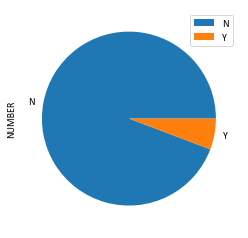

In [11]:
data = [["N",numN],["Y",numY]]
ALC_DF = pd.DataFrame(data, columns=['ALCFLAG', 'NUMBER'])
ALC_DF = ALC_DF.set_index("ALCFLAG")
ALC_DF.plot.pie(x="ALCFLAG",y="NUMBER")

In [12]:
con6=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con6["Ratio"][i]=(con6["ALC"][i]/con6["Total"][i])*100

con6["Ratio"][24]=0

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, '% Drunk Driving in Madison by Hour')

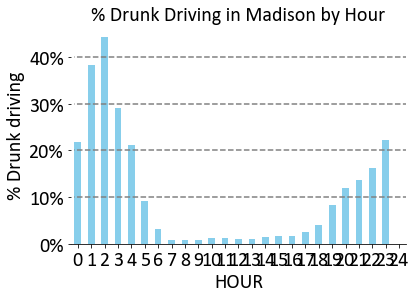

In [13]:
ax2=con6["Ratio"].plot.bar(color="skyblue",fontsize=20,rot=0)
ax2.set_xlabel("HOUR",fontsize=20)
ax2.set_ylabel("% Drunk driving",fontsize=20)

fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(11.5, 6.5)
fig.savefig('Drunk.eps', dpi=100)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

import matplotlib.ticker as mtick
import numpy as np

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,41,10)
plt.yticks(my_y_ticks)
ax2.hlines(10, 30, -0.3, colors = "grey", linestyles = "dashed")
ax2.hlines(20, 30, -0.3, colors = "grey", linestyles = "dashed")
ax2.hlines(30, 30, -0.3, colors = "grey", linestyles = "dashed")
ax2.hlines(40, 30, -0.3, colors = "grey", linestyles = "dashed")
#ax.hlines(5, 10, -0.3, colors = "grey", linestyles = "dashed")
#ax.hlines(6, 10, -0.3, colors = "grey", linestyles = "dashed")

ax2.set_title("% Drunk Driving in Madison by Hour",fontsize=20)

In [14]:
def PerALC():
    
    return con6["count()"][n]/con7["count()"][n]

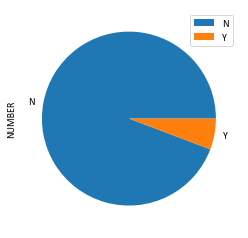

In [15]:
data = [["N",numN],["Y",numY]]
ALC_DF = pd.DataFrame(data, columns=['ALCFLAG', 'NUMBER'])
ALC_DF = ALC_DF.set_index("ALCFLAG")
ALC_DF.plot.pie(x="ALCFLAG",y="NUMBER")

In [16]:
con7=qry("""
SELECT "ACCDTYPE",sum("TOTFATL")
FROM df
GROUP BY "ACCDTYPE"
ORDER BY sum("TOTFATL") DESC
LIMIT 20
""",conn)

In [17]:
con7=qry("""
SELECT "ACCDTYPE",sum("TOTFATL"),"ALCFLAG"
FROM df
WHERE "ALCFLAG"=="Y"
GROUP BY "ACCDTYPE"
ORDER BY sum("TOTFATL") DESC
LIMIT 16
""",conn)

In [18]:
con8=qry("""
SELECT "ACCDTYPE",sum("TOTINJ")
FROM df
GROUP BY "ACCDTYPE"
ORDER BY sum("TOTINJ") DESC
LIMIT 36
""",conn)

In [19]:
con9=qry("""
SELECT "ACCDTYPE",sum("TOTINJ")
FROM df
WHERE "ALCFLAG"=="Y"
GROUP BY "ACCDTYPE"
ORDER BY sum("TOTINJ") DESC
LIMIT 36
""",conn)

In [20]:
con9=qry("""
SELECT "POSTSPD1",count()
FROM df
WHERE "VEHTYPE1"=="CAR"
GROUP BY "POSTSPD1"
""",conn)

In [21]:
con9=qry("""
SELECT "POSTSPD1",count()
FROM df
WHERE "VEHTYPE1"=="BIKE"
GROUP BY "POSTSPD1"
""",conn)

In [22]:
con10=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "VEHTYPE1"=="CAR"
GROUP BY "INJSVR"
""",conn)

In [23]:
con11=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "VEHTYPE1"=="CAR" and "POSTSPD1">=60
GROUP BY "INJSVR"
""",conn)

In [24]:
con11=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "VEHTYPE1"=="CAR" and "POSTSPD1">=60
GROUP BY "INJSVR"
""",conn)

In [25]:
con12=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">0 and "POSTSPD1"<=25 and "POSTSPD2">0 and "POSTSPD2"<=25
GROUP BY "INJSVR"
""",conn)

con12

,INJSVR,count()
0,None,19646
1,A,334
2,B,2131
3,C,4691
4,K,6


In [26]:
con13=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=30 and "POSTSPD1"<=40 and "POSTSPD2">=30 and "POSTSPD2"<=40
GROUP BY "INJSVR"
""",conn)

con13

,INJSVR,count()
0,None,22659
1,A,382
2,B,2914
3,C,7907
4,K,25


In [27]:
con14=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=45 and "POSTSPD1"<=55 and "POSTSPD2">=45 and "POSTSPD2"<=55
GROUP BY "INJSVR"
""",conn)

con14

,INJSVR,count()
0,None,6271
1,A,155
2,B,819
3,C,2266
4,K,14


In [28]:
con15=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=60 and "POSTSPD2">=60
GROUP BY "INJSVR"
""",conn)

con15

,INJSVR,count()
0,None,1699
1,A,44
2,B,218
3,C,432
4,K,9


In [29]:
import math
data={"45-55":[(14/988)*100,(155/988)*100,(819/988)*100],"30-40":[(25/3321)*100,(382/3321)*100,(2914/3321)*100],"0-25":[(6/2471)*100,(334/2471)*100,(2131/2471)*100],">60":[(9/271)*100,(44/271)*100,(218/271)*100]}
df=pd.DataFrame(data,index=["Fatal","In-capacitating","Non-Incapacitating"])
df

,45-55,30-40,0-25,>60
Fatal,1.417004,0.752785,0.242817,3.321033
In-capacitating,15.688259,11.502559,13.516795,16.236162
Non-Incapacitating,82.894737,87.744655,86.240389,80.442804


In [30]:
import math
data={"0-25":[0.12*10,1.81,math.log(9.73)],"30-40":[0.16*10,1.64,math.log(9.55)],"45-55":[0.34*10,1.94,math.log(9.5)],">60":[0.35*10,1.87,math.log(9.11)]}
df=pd.DataFrame(data,index=["Fatal","In-capacitating","Non-Incapacitating"])
df

,0-25,30-40,45-55,>60
Fatal,1.200000,1.600000,3.400000,3.500000
In-capacitating,1.810000,1.640000,1.940000,1.870000
Non-Incapacitating,2.275214,2.256541,2.251292,2.209373


d:\搜狗高速下载\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


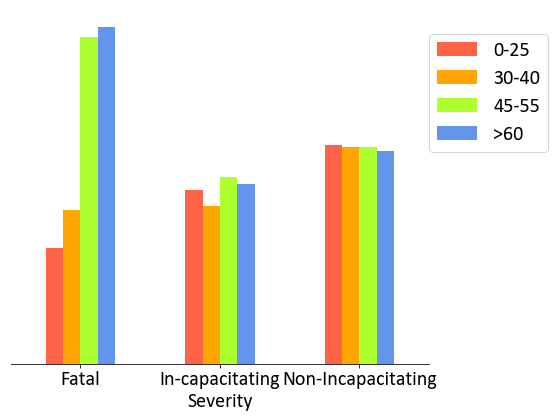

In [31]:
color=["tomato","orange","greenyellow","cornflowerblue"]
ax3=df.plot.bar(colors=color,rot=0,fontsize=20)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax3.set_xlabel("Severity",fontsize=20)
#ax3.set_title("The Correlation between Speed Limit and Severity",fontsize=20)
#ax3.set_ylabel("% Fatality")
ax3.legend(loc=[1, 0.6],fontsize=20)
plt.yticks([])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7.5, 6.5)
fig.savefig('SPEED.eps', dpi=100,bbox_inches="tight")